# Black Hole Mass Estimation

Student: Ridha Fathima Mohideen Malik

Instructor: Isidora Jankov

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shen11_500 = pd.read_csv('shen_subsample_500.csv', sep=',')
shen11_500.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23


### 1. a) Crossmatching with SDSS for z and $H_\beta$ flux

In [4]:
from astroquery.sdss import SDSS

with open('query.txt', 'r') as file:
    query = file.read().replace('\n', '') # input is a single string

cat = SDSS.query_sql(query).to_pandas()

cat

/home/ridha-mm/agn/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,plate,mjd,fiberid,z,subclass,e_bv_sfd,h_beta_flux,sigma_balmer
0,269,51910,561,0.692667,b'BROADLINE',0.034368,1.371369e+01,179.1015
1,272,51941,436,0.617588,b'BROADLINE',0.044976,5.935807e+01,500.0000
2,277,51908,94,0.156028,b'STARBURST BROADLINE',0.045870,8.975030e+01,500.0000
3,281,51614,420,0.615688,b'BROADLINE',0.026297,2.072434e+02,500.0000
4,282,51630,153,0.386017,b'STARBURST',0.022608,1.200783e+01,356.8219
...,...,...,...,...,...,...,...,...
30744,2960,54561,504,0.410527,b'',0.031682,1.678424e+09,204.3193
30745,2969,54586,602,0.408930,b'',0.039592,5.838654e+00,500.0000
30746,2971,54590,117,0.093411,b'STARBURST BROADLINE',0.031790,2.777611e+02,356.4552
30747,2972,54586,148,0.083666,b'STARBURST BROADLINE',0.030130,3.610479e+03,470.5297


In [41]:
for id_shen11_500, plate_shen11_500, mjd_shen11_500, fiber_shen11_500 in zip(shen11_500.index, shen11_500['Plate'], shen11_500['MJD'], shen11_500['Fiber']):
        for id_cat, plate_cat, mjd_cat, fiber_cat in zip(cat.index, cat['plate'], cat['mjd'], cat['fiberid']):
                if plate_cat == plate_shen11_500 and mjd_cat == mjd_shen11_500 and fiber_cat == fiber_shen11_500:
                        shen11_500.loc[id_shen11_500, 'found'] = "yes"
                        shen11_500.loc[id_shen11_500, 'z'] = cat.loc[id_cat, 'z']
                        shen11_500.loc[id_shen11_500, 'Flux_Hb'] = cat.loc[id_cat, 'h_beta_flux']
                        shen11_500.loc[id_shen11_500, 'FWHM_Hb'] = 2.36 * cat.loc[id_cat, 'sigma_balmer']

In [42]:
match = shen11_500[shen11_500['found']=="yes"]
match = match.drop(labels='found', axis=1)

match.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,z,Flux_Hb,E_SFD,FWHM_Hb
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,...,62.0,3.1,23.06,8.33,0.07,-1.20,0.228846,323.90260,0.016107,1180.000000
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,...,89.4,8.7,15.06,7.59,0.20,-0.87,0.178252,448.13070,0.020710,1180.000000
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,...,32.1,3.4,16.27,9.05,0.35,-2.03,0.201624,86.80108,0.018962,681.925540
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,...,118.7,6.3,19.79,9.36,0.02,-2.33,0.239360,370.09130,0.024821,534.670980
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,...,52.5,2.9,15.96,7.29,0.03,-0.23,0.235311,589.24180,0.017947,978.193804


### 1.b) Exploring the data

Text(0, 0.5, 'count')

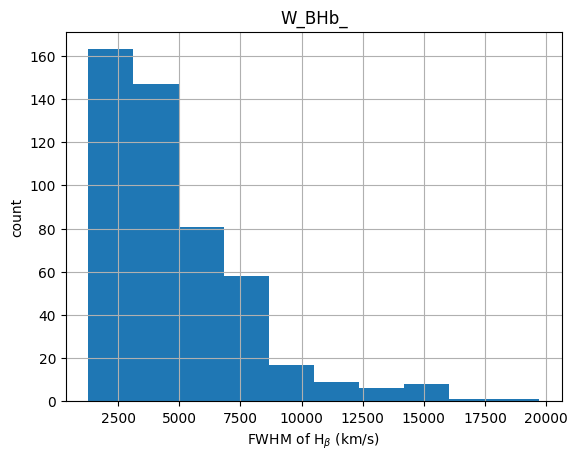

In [17]:
match.hist(column='W_BHb_', bins=10)
plt.xlabel(r'FWHM of H$_\beta$ (km/s)')
plt.ylabel('count')

Our sample has broadline regions, since FWHM > 1000 km/s

Text(0, 0.5, 'count')

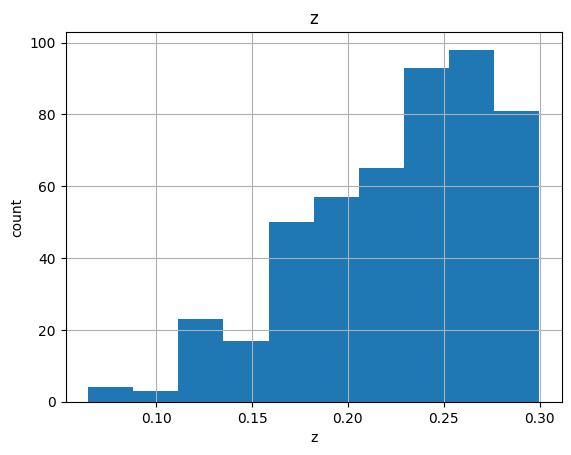

In [12]:
match.hist(column='z', bins=10)
plt.xlabel('z')
plt.ylabel('count')

The plot follows the previously observed trend of increase in Quasar population with z.

<img src="https://www.researchgate.net/profile/Peter-Jackson-17/publication/275970919/figure/fig2/AS:667863744536576@1536242533000/Quasar-population-distribution-for-redshift-z-14-from-the-46-000-SDSS-DR4-2QZ.png" width=500 height=300>

Source: Jackson et al (2015), A CYCLIC MODEL OF GALAXY EVOLUTION WITH BARS

Text(0, 0.5, 'count')

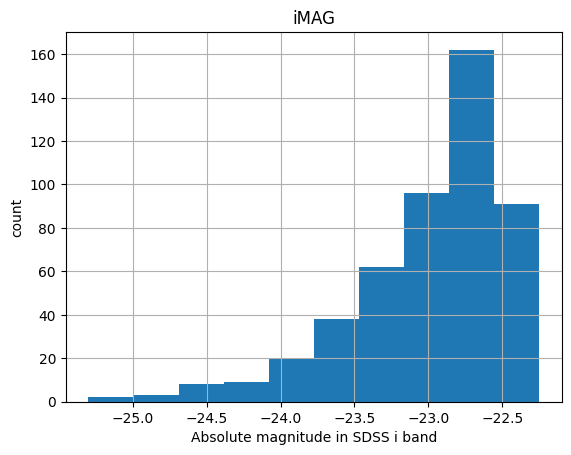

In [16]:
match.hist(column='iMAG', bins=10)
plt.xlabel('Absolute magnitude in SDSS i band')
plt.ylabel('count')

Text(0.5, 1.0, 'Magnitude vs redshift')

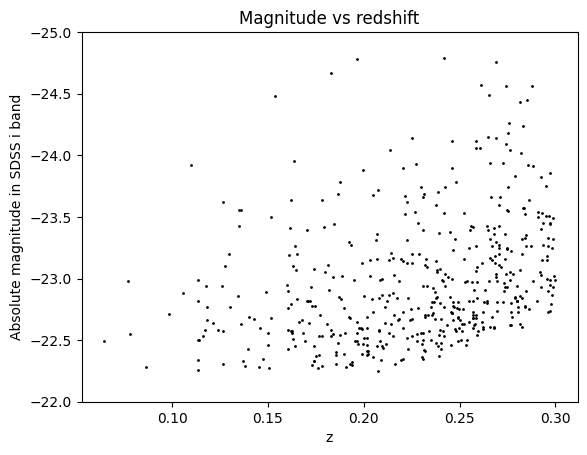

In [20]:
plt.scatter(match['z'], match['iMAG'], s=1, c='k')
plt.ylim(-22,-25)
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.title("Magnitude vs redshift")

The sample's limitation to nearby quasars and in number did not reveal obvious trend in magnitude seen in the Shen et al paper. So we query Shen's catalog to understand this.

In [19]:
from astroquery.vizier import Vizier

catalogs = Vizier(catalog='J/ApJS/194/45', row_limit=-1, columns=['all']).query_constraints()
interesting_table = catalogs['J/ApJS/194/45/catalog']
shen11_full = interesting_table.to_pandas()
shen11_full.to_csv("shen11_full.txt", sep='\t')

Text(0.5, 1.0, 'Magnitude vs redshift')

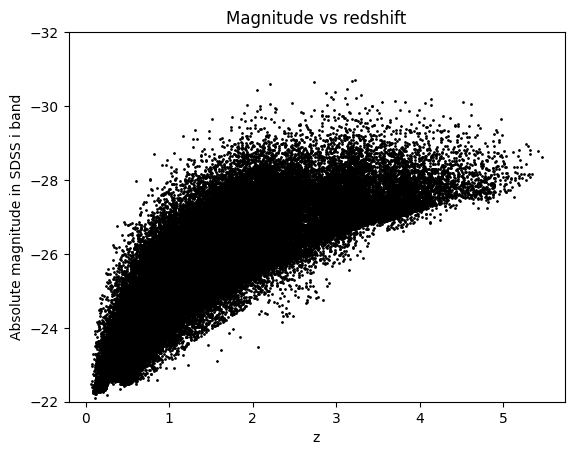

In [21]:
plt.scatter(shen11_full['z'], shen11_full['iMAG'], s=1, c='k')
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.ylim(-22,-32)
plt.title("Magnitude vs redshift")

Text(0.5, 1.0, 'Magnitude vs redshift')

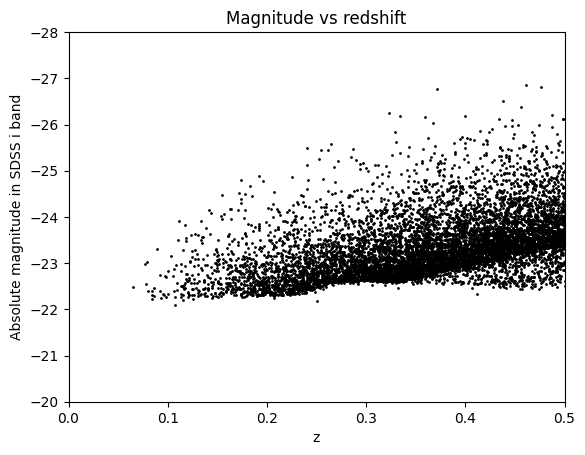

In [24]:
plt.scatter(shen11_full['z'], shen11_full['iMAG'], s=1, c='k')
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.ylim(-20,-28)
plt.xlim(0, 0.5)
plt.title("Magnitude vs redshift")

There seems to be a correlation between the redshift and the minimum brightness of a quasar. For nearby quasars up to 0.25 - 0.3 z, the minimum seems to be a constant around -22 mags. 

Comparing with this plot for apparent magnitudes vs redshift, where the black line is the cosmological redshift-distance modulus line:

<img src="https://johnhartnettdotorg.files.wordpress.com/2014/05/hubble-qsos-and-galaxies-copy.png" width=500 height=400>

Source: [What do quasars tell us about the universe?, Hartnett (2014)](https://biblescienceforum.com/2014/05/10/what-do-quasars-tell-us-about-the-universe/)

This change in trend after 0.3 z could be due to an intrinsic source in redshift at higher z (Hartnett (2014)).

### Black hole mass using scaling relations from photo-reverberation studies

In [25]:
import astropy.constants as const
import astropy.units as u

In [44]:
# Calculating luminosity distance in cm 
# and luminosity of H beta line in erg/s, based on Hogg (2000)

H_0 = 67.8 * u.km / u.s / u.Mpc
D_H = const.c / H_0

match['d_L_der'] = match['z'] * D_H.to(u.cm)

match['L_Hb_der'] = 4 * np.pi * match['Flux_Hb'] * 10**-17 * u.erg / (u.cm ** 2 * u.s) * (match['d_L_der'])**2

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

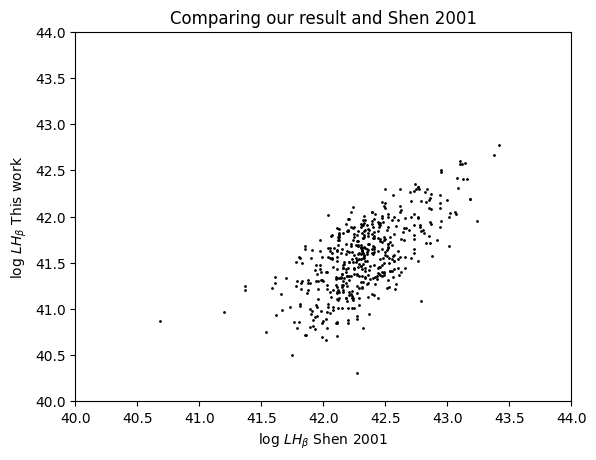

In [40]:
# Comparing our derived result with Shen (2011) results

plt.scatter(match['logLBHb'], np.log10(match['L_Hb_der']), s=1, c='k')
plt.xlabel(r'log $L H_{\beta}$ Shen 2001')
plt.ylabel(r'log $L H_{\beta}$ This work')
plt.xlim(40, 44)
plt.ylim(40, 44)
plt.title("Comparing our result and Shen 2001")

In [52]:
# Obtaining black hole mass based on Wu (2009)

match['M_BH_der'] = 2.4 * 10**6 * (match['L_Hb_der']/10**42)**0.59 * (match['FWHM_Hb']/10**3)**2

In [53]:
match.hist(column='M_BH_der', bins=10)
plt.xlabel('Derived black hole mass')
plt.ylabel('count')

UnitConversionError: '' (dimensionless) and 'erg / (cm2 s)' (energy flux/irradiance) are not convertible

In [47]:
# Obtaining bolometric luminosity based on Wu (2009)

match['logLbol_der'] = (0.94 * np.log10(match['L_Hb_der'])) + 5.39

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

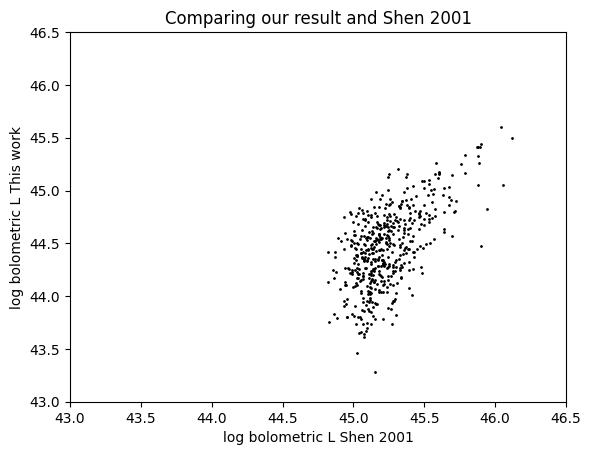

In [49]:
plt.scatter(match['logLbol'], match['logLbol_der'], s=1, c='k')
plt.xlabel('log bolometric L Shen 2001')
plt.ylabel('log bolometric L This work')
plt.xlim(43, 46.5)
plt.ylim(43, 46.5)
plt.title("Comparing our result and Shen 2001")

In [42]:
match['L_ed'] = 3.2 * 10**4 * match['M_BH'] * (const.L_sun.to(u.erg / u.s))

In [47]:
# Calculating Eddington ratio

match['lambda_der'] = (10**match['logLbol_der']* u.erg/u.s)/match['L_ed']

(array([211.,  93.,  41.,  31.,  24.,  21.,  15.,   9.,  12.,   8.,   5.,
          2.,   5.,   4.,   5.,   1.,   1.,   0.,   0.,   3.]),
 array([0.012296779772786865, 0.4382194149428783, 0.8641420501129697,
        1.290064685283061, 1.7159873204531526, 2.141909955623244,
        2.5678325907933353, 2.993755225963427, 3.4196778611335183,
        3.84560049630361, 4.271523131473701, 4.697445766643793,
        5.123368401813884, 5.549291036983975, 5.975213672154067,
        6.401136307324158, 6.82705894249425, 7.252981577664341,
        7.678904212834433, 8.104826848004523, 8.530749483174615],
       dtype=object),
 <BarContainer object of 20 artists>)

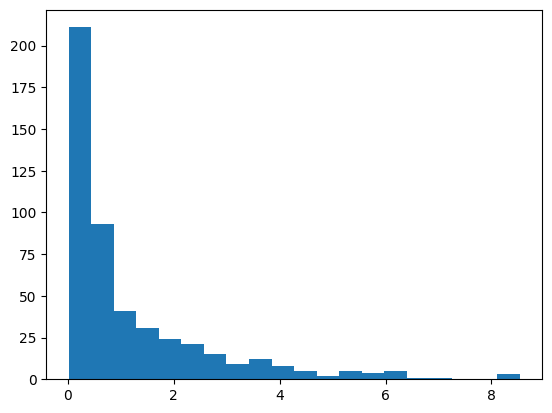

In [52]:
match.hist(column='lamda_der', bins=10)
plt.xlabel('Derived Eddington ratio')
plt.ylabel('count')

(array([228., 136.,  66.,  25.,  17.,   2.,   6.,   1.,   2.,   1.,   2.,
          0.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([38744914.49383723, 315787489.8846907, 592830065.2755442,
        869872640.6663977, 1146915216.057251, 1423957791.4481044,
        1701000366.838958, 1978042942.2298114, 2255085517.620665,
        2532128093.0115185, 2809170668.402372, 3086213243.7932253,
        3363255819.184079, 3640298394.5749326, 3917340969.965786,
        4194383545.3566394, 4471426120.747493, 4748468696.138347,
        5025511271.5292, 5302553846.9200535, 5579596422.310906],
       dtype=object),
 <BarContainer object of 20 artists>)

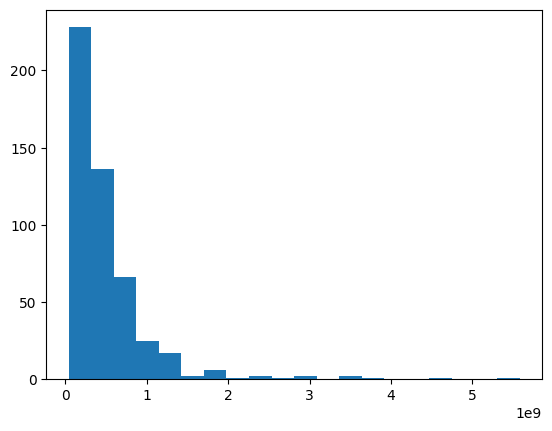

In [53]:
plt.hist(match['M_BH'], bins=20)

### Black hole mass using host bulge luminosity

In [4]:
from astroquery.simbad import Simbad

Simbad.add_votable_fields('otypes', 'flux(R)')
result_table = Simbad.query_bibobj('2009MNRAS.398.1905W').to_pandas()

wu09_simbad = result_table[['MAIN_ID', 'RA', 'DEC', 'OTYPES', 'FLUX_R']]

wu09_simbad.head()

,MAIN_ID,RA,DEC,OTYPES,FLUX_R
0,ICRF J002225.4+001456,00 22 25.4258,+00 14 56.163,BiC|QSO|G|Opt|Rad|Rad|X,NaN
1,3C 43,01 29 59.7696,+23 38 20.041,QSO|QSO|QSO|*|G|Opt|Rad,NaN
2,2MASS J01341690-4258262,01 34 16.9072,-42 58 26.223,NIR|MIR|Sy1|QSO|*|G|Rad|X,16.709999
3,3C 48,01 37 41.2996,+33 09 35.080,QSO|QSO|QSO|AGN|QSO|MIR|NIR|*|G|IR|Opt|Rad|Rad...,NaN
4,7C 022118.10+273638.00,02 24 12.2865,+27 50 11.538,QSO|AGN|Sy1|*|G|Rad,18.263000


In [5]:
from astroquery.ipac.ned import Ned

wu09_ned = Ned.query_refcode('2009MNRAS.398.1905W').to_pandas()

wu09_ned.head()

,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
0,1,4C +00.02,5.60594,0.24893,G,91731.0,0.305981,SLS,19.5,NaN,105,2,90,22,7,6,0
1,2,3C 043,22.49921,23.63897,QSO,437397.0,1.459000,SUN,19.0,NaN,194,7,122,19,8,0,0
2,3,WISEA J013416.90-425826.2,23.57042,-42.97417,G,71091.0,0.237134,SLS,16.0,NaN,40,2,34,8,4,0,0
3,4,3C 048,24.42208,33.15976,QSO,110623.0,0.369000,SLS,16.06,NaN,801,18,259,45,17,4,0
4,5,3C 067,36.05125,27.83654,G,92996.0,0.310200,SUN,18.0,NaN,193,8,100,19,6,1,0


In [6]:
# count function

import re

def count(str1, str2): 
    '''
    Counts how much percentage two strings match. 
    ------
    INPUT:
    ------
    str1, str2: strings
    ------
    OUTPUT:
    ------
    match: percentage match
    '''
    
    str1 = re.sub(r"[\u02BB\u02BC\u066C\u2018\u201A\u275B\u275C\u0027\u02B9\u02BB\u02BC\u02BE\u02C8\u02EE\u0301\u0313\u0315\u055A\u05F3\u07F4\u07F5\u1FBF\u2018\u2019\u2032\uA78C\uFF07]", "p", str1)
    str2 = re.sub(r"[\u02BB\u02BC\u066C\u2018\u201A\u275B\u275C\u0027\u02B9\u02BB\u02BC\u02BE\u02C8\u02EE\u0301\u0313\u0315\u055A\u05F3\u07F4\u07F5\u1FBF\u2018\u2019\u2032\uA78C\uFF07]", "p", str2)
    
    diff = len(str1) - len(str2)
    if diff < 0:
      temp = str1
      str1 = str2
      str2 = temp
    else:
      pass

    c, j = 0,0
    for i in str1:    
        if str2.find(i)>= 0 and j == str1.find(i): 
            c += 1
        j+=1
    
    if len(str1)>0:
        match = c/len(str1)*100
    else:
        match = 0

    return match

def stripcount(str1, str2): 
    '''
    Counts how much percentage two strings match excluding special characters 
    ------
    INPUT:
    ------
    str1, str2: strings
    ------
    OUTPUT:
    ------
    match: percentage match excluding special characters
    '''

    str1 = ''.join(i for i in str1 if i.isalnum()).lower() ## removes special characters
    str2 = ''.join(i for i in str2 if i.isalnum()).lower()

    diff = len(str1) - len(str2)
    if diff < 0:
      str1 = str1 + ("-"*diff)
    elif diff > 0:
      str2 = str2 + ("-"*diff)
    else:
      pass
    
    c, j = 0,0
    for i in str1:    
        if str2.find(i)>= 0 and j == str1.find(i): 
            c += 1
        j+=1
    
    if len(str1)>0:
        match = c/len(str1)*100
    else:
        match = 0

    return match

In [15]:
for n, i in enumerate(wu09_simbad['MAIN_ID']):
    for m, j in enumerate(wu09_ned['Object Name']):
        wu09_ned.loc[m, 'match'] = count(i, j)

    max_id = wu09_ned['match'].idxmax()
    wu09_simbad.loc[n, 'type_ned'] = wu09_ned.loc[max_id, 'Type']
    wu09_simbad.loc[n, 'z'] = wu09_ned.loc[max_id, 'Redshift']

In [16]:
wu09_simbad = wu09_simbad.rename(columns={'OTYPES': 'types_simbad', 'FLUX_R': 'mag_R_app'})
wu09_simbad_QSO = wu09_simbad[wu09_simbad['type_ned'] == 'QSO']

In [ ]:
H_0 = 67.8 * u.km / u.s / u.Mpc
D_H = const.c / H_0

wu09_simbad['d_L'] = wu09_simbad['z'] * D_H.to(u.parsec)

In [5]:
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord

def ebv(ra:str, dec:str):
    coords = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))
    sfd = SFDQuery()
    ebv = sfd(coords)

    return ebv

0.029586598

In [ ]:
lambda_R = 6696
coeff_R = 2.28

In [ ]:
wu09_simbad['mag_R_abs'] = wu09_simbad['mag_R_app'] + coeff_R * ebv(wu09_simbad['RA'], wu09_simbad['DEC']) + 5 * np.log10(wu09_simbad['d_L']/10) # d in pc

In [17]:
wu09_simbad['M_BH/M⊙'] = 10 ** (- 0.5 * wu09_simbad['mag_R_abs'] - 2.74)

In [ ]:
wu09_simbad['lamda_Ed'] = ?????

### References

- Shen et al. 2011 paper; https://ui.adsabs.harvard.edu/abs/2011ApJS..194...45S/abstract
- Wu 2009;  http://adsabs.harvard.edu/abs/2009MNRAS.398.1905W
- McLure & Dunlop 2002; http://adsabs.harvard.edu/abs/2002MNRAS.331..795M
- Hogg 2000; https://arxiv.org/abs/astro-ph/9905116 